In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-agriculture-crop-production/India Agriculture Crop Production.csv


In [2]:
df = pd.read_csv('/kaggle/input/india-agriculture-crop-production/India Agriculture Crop Production.csv')
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [4]:
df['Production']/df['Area']

0         1.643541
1         1.655803
2         1.209358
3         1.690000
4         1.696296
            ...   
345402         NaN
345403         NaN
345404         NaN
345405         NaN
345406         NaN
Length: 345407, dtype: float64

In [5]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [6]:
df['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Telangana', 'Laddakh'], dtype=object)

In [7]:
df['Crop'].unique()

array(['Arecanut', 'Banana', 'Black pepper', 'Cashewnut', 'Coconut',
       'Dry chillies', 'Ginger', 'Other Kharif pulses', 'other oilseeds',
       'Rice', 'Sugarcane', 'Sweet potato', 'Arhar/Tur', 'Bajra',
       'Castor seed', 'Coriander', 'Cotton(lint)', 'Gram', 'Groundnut',
       'Horse-gram', 'Jowar', 'Linseed', 'Maize', 'Mesta',
       'Moong(Green Gram)', 'Niger seed', 'Onion', 'Other Rabi pulses',
       'Potato', 'Ragi', 'Rapeseed &Mustard', 'Safflower', 'Sesamum',
       'Small millets', 'Soyabean', 'Sunflower', 'Tapioca', 'Tobacco',
       'Turmeric', 'Urad', 'Wheat', 'Oilseeds total', 'Jute', 'Masoor',
       'Peas & beans (Pulses)', 'Barley', 'Garlic', 'Khesari', 'Sannhamp',
       'Guar seed', 'Moth', 'Cardamom', 'Other Cereals', 'Cowpea(Lobia)',
       'Dry Ginger', 'Other Summer Pulses', nan], dtype=object)

In [8]:
print(df['Year'].min())
print(df['Year'].max())


1997-98
2020-21


In [9]:
df['Season'].unique()

array(['Kharif', 'Whole Year', 'Rabi', 'Autumn', 'Summer', 'Winter', nan],
      dtype=object)

In [10]:
df.groupby('Season').count()['Production']
# Kharif -> 1
# Non-Kharif -> 0

Season
Autumn          6967
Kharif        136165
Rabi           99805
Summer         21974
Whole Year     67265
Winter          8238
Name: Production, dtype: int64

In [11]:
df.groupby('State').count()['Production'].sort_values(ascending=False)

State
Uttar Pradesh                  44635
Madhya Pradesh                 29455
Karnataka                      27322
Bihar                          24686
Rajasthan                      19743
Assam                          18179
Tamil Nadu                     18051
Maharashtra                    17615
Andhra Pradesh                 16162
Odisha                         16101
Chhattisgarh                   14732
Gujarat                        13968
West Bengal                    12580
Haryana                         6931
Uttarakhand                     6628
Nagaland                        5674
Jharkhand                       4991
Himachal Pradesh                4974
Telangana                       4662
Kerala                          4642
Arunachal Pradesh               4344
Jammu and Kashmir               4342
Meghalaya                       4322
Punjab                          4098
Manipur                         3092
Tripura                         2557
Mizoram                         

(array([27493.,     0.,     0.,     0.,     0., 29906.,     0.,     0.,
            0., 44781.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

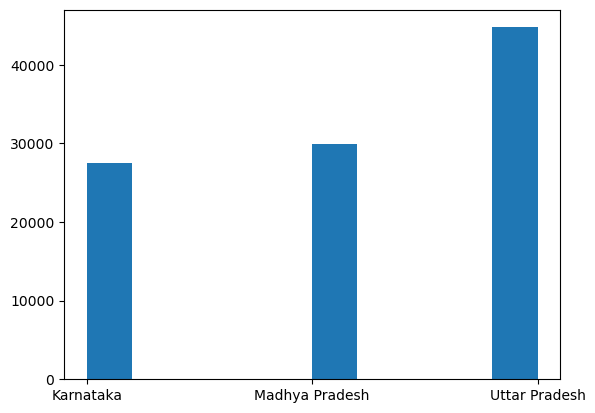

In [12]:
import matplotlib.pyplot as plt

plt.hist(df[df['State'].isin([
    'Uttar Pradesh',
    'Madhya Pradesh',
    'Karnataka'
])]['State'])

In [13]:
df.groupby('Crop').mean()['Production'].sort_values(ascending=False)

Crop
Coconut                  1.075077e+08
Sugarcane                6.687482e+05
Wheat                    1.789251e+05
Jute                     1.254349e+05
Rice                     1.036679e+05
Oilseeds total           8.225798e+04
Cotton(lint)             7.659196e+04
Potato                   5.893519e+04
Tapioca                  5.782603e+04
Banana                   5.171814e+04
Soyabean                 4.276125e+04
Bajra                    2.592582e+04
Maize                    2.184029e+04
Arecanut                 1.827877e+04
Gram                     1.551369e+04
Jowar                    1.541581e+04
Guar seed                1.531635e+04
Rapeseed &Mustard        1.372251e+04
Groundnut                1.309085e+04
Onion                    1.255474e+04
other oilseeds           9.931330e+03
Ragi                     7.729901e+03
Castor seed              6.216491e+03
Barley                   6.038105e+03
Mesta                    5.931729e+03
Arhar/Tur                5.686034e+03
Moth   

In [14]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [15]:
df_updated = df.replace(to_replace ='-[0-9][0-9]', value = '', regex = True)

In [16]:
df_updated.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [17]:
series = df_updated[['Year', 'Production', 'Season', 'Crop']]
series

,Year,Production,Season,Crop
0,2001,2061.0,Kharif,Arecanut
1,2002,2083.0,Whole Year,Arecanut
2,2003,1525.0,Whole Year,Arecanut
3,2001,5239.0,Kharif,Arecanut
4,2002,5267.0,Whole Year,Arecanut
...,...,...,...,...
345402,2019,NaN,Rabi,NaN
345403,2019,NaN,Rabi,NaN
345404,2019,NaN,Rabi,NaN
345405,2019,NaN,Rabi,NaN


In [18]:
series.dtypes

Year           object
Production    float64
Season         object
Crop           object
dtype: object

In [19]:
series.groupby('Year').count()

,Production,Season,Crop
Year,,,
1997,8549,8549,8549
1998,12014,12290,12290
1999,12939,13013,13013
2000,13488,13593,13593
2001,13239,13307,13307
2002,14047,14182,14182
2003,14514,14662,14662
2004,13888,14151,14151
2005,13775,14063,14063


In [20]:
series.isna().groupby('Year').sum()

,Production,Season,Crop
Year,,,
False,4993,1,32


In [21]:
plot_df = series.groupby('Year').sum()['Production'].sort_values(ascending=False)
plot_df

Year
2011    1.939837e+10
2015    1.849115e+10
2019    1.842530e+10
2018    1.806107e+10
2014    1.788990e+10
2013    1.720176e+10
2009    1.670823e+10
2016    1.652594e+10
2008    1.627291e+10
2017    1.602760e+10
2006    1.581477e+10
2005    1.504934e+10
2007    1.457585e+10
2004    1.392426e+10
2012    1.318740e+10
2002    1.251436e+10
2003    1.243323e+10
2010    1.208182e+10
2000    9.666099e+09
2001    9.423700e+09
1999    8.566818e+09
1998    7.887214e+09
1997    6.105673e+09
2020    1.017723e+07
Name: Production, dtype: float64

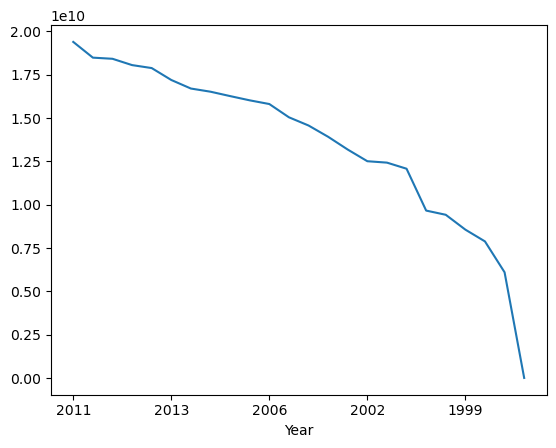

In [22]:
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# series['Year'] = pd.to_datetime(series['Year'])
# series['Year'] = series['Year'].
plot_df.plot()
plt.show();

In [23]:
df_updated.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [24]:
df_dataset = df_updated[['Crop', 'Season', 'Area', 'Production']]
df_dataset = df_dataset.dropna(subset=['Production'])
df_dataset.tail()

,Crop,Season,Area,Production
345370,Wheat,Rabi,6310.0,15280.0
345371,Wheat,Rabi,1895.0,2760.0
345372,Wheat,Rabi,3736.0,5530.0
345373,Wheat,Rabi,2752.0,6928.0
345374,Wheat,Rabi,2979.0,7430.0


In [25]:
df_dataset = pd.get_dummies(data=df_dataset, columns=['Crop', 'Season'])
print(df_dataset)

          Area  Production  Crop_Arecanut  Crop_Arhar/Tur  Crop_Bajra  \
0       1254.0      2061.0              1               0           0   
1       1258.0      2083.0              1               0           0   
2       1261.0      1525.0              1               0           0   
3       3100.0      5239.0              1               0           0   
4       3105.0      5267.0              1               0           0   
...        ...         ...            ...             ...         ...   
345370  6310.0     15280.0              0               0           0   
345371  1895.0      2760.0              0               0           0   
345372  3736.0      5530.0              0               0           0   
345373  2752.0      6928.0              0               0           0   
345374  2979.0      7430.0              0               0           0   

        Crop_Banana  Crop_Barley  Crop_Black pepper  Crop_Cardamom  \
0                 0            0                  0  

In [26]:
df_dataset.columns

Index(['Area', 'Production', 'Crop_Arecanut', 'Crop_Arhar/Tur', 'Crop_Bajra',
       'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom',
       'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut', 'Crop_Coriander',
       'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry Ginger',
       'Crop_Dry chillies', 'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram',
       'Crop_Groundnut', 'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar',
       'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize',
       'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth',
       'Crop_Niger seed', 'Crop_Oilseeds total', 'Crop_Onion',
       'Crop_Other Cereals', 'Crop_Other Kharif pulses',
       'Crop_Other Rabi pulses', 'Crop_Other Summer Pulses',
       'Crop_Peas & beans (Pulses)', 'Crop_Potato', 'Crop_Ragi',
       'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean',
       'Crop_Sugarcane

In [27]:
from sklearn.model_selection import train_test_split

X = df_dataset[['Area','Crop_Arecanut', 'Crop_Arhar/Tur', 'Crop_Bajra',
       'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom',
       'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut', 'Crop_Coriander',
       'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry Ginger',
       'Crop_Dry chillies', 'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram',
       'Crop_Groundnut', 'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar',
       'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize',
       'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth',
       'Crop_Niger seed', 'Crop_Oilseeds total', 'Crop_Onion',
       'Crop_Other Cereals', 'Crop_Other Kharif pulses',
       'Crop_Other Rabi pulses', 'Crop_Other Summer Pulses',
       'Crop_Peas & beans (Pulses)', 'Crop_Potato', 'Crop_Ragi',
       'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean',
       'Crop_Sugarcane', 'Crop_Sunflower', 'Crop_Sweet potato', 'Crop_Tapioca',
       'Crop_Tobacco', 'Crop_Turmeric', 'Crop_Urad', 'Crop_Wheat',
       'Crop_other oilseeds', 'Season_Autumn', 'Season_Kharif', 'Season_Rabi',
       'Season_Summer', 'Season_Whole Year', 'Season_Winter']]
y = df_dataset[['Production']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
print(y_train.values.ravel().shape)

(228077,)


In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(228077, 63)
(112337, 63)
(228077, 1)
(112337, 1)


In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train.values.ravel())
reg.score(X_test, y_test.values.ravel())

0.20271191304098735

In [31]:
X_test.columns

Index(['Area', 'Crop_Arecanut', 'Crop_Arhar/Tur', 'Crop_Bajra', 'Crop_Banana',
       'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom', 'Crop_Cashewnut',
       'Crop_Castor seed', 'Crop_Coconut', 'Crop_Coriander',
       'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry Ginger',
       'Crop_Dry chillies', 'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram',
       'Crop_Groundnut', 'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar',
       'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize',
       'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth',
       'Crop_Niger seed', 'Crop_Oilseeds total', 'Crop_Onion',
       'Crop_Other Cereals', 'Crop_Other Kharif pulses',
       'Crop_Other Rabi pulses', 'Crop_Other Summer Pulses',
       'Crop_Peas & beans (Pulses)', 'Crop_Potato', 'Crop_Ragi',
       'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean',
       'Crop_Sugarcane', 'Crop_Sunfl

In [32]:
reg.coef_

array([ 2.19389880e+01, -1.84341795e+06, -1.88158263e+06, -2.28748149e+06,
       -1.78152649e+06, -1.78606804e+06, -1.84562665e+06, -1.83273423e+06,
       -1.86657982e+06, -1.80959744e+06,  1.07265860e+08, -1.80473736e+06,
       -2.45148009e+06, -1.76852503e+06, -1.86261403e+06, -1.79754846e+06,
       -1.78264757e+06, -1.75929024e+06, -2.10624529e+06, -2.00210026e+06,
       -2.44450178e+06, -1.75377502e+06, -2.11128141e+06, -1.83779684e+06,
       -1.86185443e+06, -1.76664570e+06, -1.96679960e+06, -1.82666977e+06,
       -1.72894241e+06, -1.88117684e+06, -2.09887279e+06, -1.76409125e+06,
       -4.22901799e+06, -1.79598933e+06, -1.76350528e+06, -1.76876976e+06,
       -1.78979980e+06, -1.98800406e+06, -1.77632928e+06, -1.74465214e+06,
       -1.88521318e+06, -1.97159503e+06, -2.68856401e+06, -1.80811820e+06,
       -1.75225977e+06, -1.80741836e+06, -1.78522480e+06, -2.58773907e+06,
       -1.30364344e+06, -1.85295735e+06, -1.76753823e+06, -1.75406077e+06,
       -1.82849638e+06, -

In [33]:
reg.intercept_

1797817.6087594172

In [34]:
import math


n = 4
print(n)
print(math.log(n))
print(round(2.6))

4
1.3862943611198906
3


In [35]:
s = 'First line.\tSecond line.'
print(s)

word = 'Python'
for character in word:
    print(character)
    

good_features = [
    'feature1',
    'feature2',
    'featuren'
]
len(good_features)

First line.	Second line.
P
y
t
h
o
n


3

In [36]:
# import str

s = 'IE'
print(str.lower(s))
'1|2|3'.split('|')



# lists
[1, 2, 3, 1, 1, 1]
# tuples
()
# sets
(1, 2, 3)

ie


(1, 2, 3)

In [37]:
list1 = [1, 2, 3, 3, 4, 5, 6]
print("\nTuple using List: ")
print(tuple(list1))


my_tuple = tuple(list1)
print(my_tuple[0])
# my_tuple[0] = 2

my_list = list1
print(my_list[0])
my_list[0] = 2
print(my_list[0])

my_set = set(list1)
print(my_set)


Tuple using List: 
(1, 2, 3, 3, 4, 5, 6)
1
1
2
{2, 3, 4, 5, 6}


In [38]:
tel = {
    'jack': 4098, 
    'sape': 4139,
    1: 'jack',
    2: 'jill'
}

# tel = dict(
#     [
#         ('sape', 4139), 
#         ('guido', 4127), 
#         ('jack', 4098)
#     ]
# )

In [39]:
cars = 'car1'
print('before the for loop')
print()

for i, j in tel.items():
    print('in the for loop')
    print(i, j)
    print("key", i)
    print("val", j)
    
print()
print('after the for loop')
print("key", i)
print("val", j)

before the for loop

in the for loop
jack 4098
key jack
val 4098
in the for loop
sape 4139
key sape
val 4139
in the for loop
1 jack
key 1
val jack
in the for loop
2 jill
key 2
val jill

after the for loop
key 2
val jill


In [40]:
my_list = ['tic', 'tac', 'toe']
print(my_list[0])
print(my_list[1])
print(my_list[2])

for i, v in enumerate(my_list):
    print(i, v)
    print(my_list[i])

tic
tac
toe
0 tic
tic
1 tac
tac
2 toe
toe


1. Write a function that accepts an integer (n) and computes the value of n + nn + nnn. (nn means n times n.)

2a. Write a function that has as input parameter "guess" a guessed dice value, then throws a dice, and returns the difference between the thrown value and the guessed value.
2b. Change the above function to guess the sum of three throws instead.
2c. Write a function dice() that takes as input parameter the number of sides of the dice and returns a random dice throw. Edit the functions from 2a and 2b to use this function instead.

3. Write a function that accepts the radius of a circle as input and computes the area.

4. Take or rewrite the function that returns the Euclidean distance between two points.

5. Write a function that takes a first and last name as input and returns them in reverse order, with the last name in capitals.

In [41]:
# 1. Write a function that accepts an integer (n) and computes the value of n + nn + nnn. (nn means n times n.)

def calc_eqn_n(n=10):
    result = n + (n * n) + (n * n * n)
    print(result)
    return result

result1 = calc_eqn_n()
result2 = calc_eqn_n(n=10)
result4 = calc_eqn_n(n=20)
result6 = calc_eqn_n(n=30)

print(result1)
print(result2)
print(result4)
print(result6)

1110
1110
8420
27930
1110
1110
8420
27930


In [42]:
# 2a. Write a function that has as input parameter "guess" a guessed dice value, then throws a dice, 
#     and returns the difference between the thrown value and the guessed value. 
# 2b. Change the above function to guess the sum of three throws instead. 
# 2c. Write a function dice() that takes as input parameter the number of sides of the dice 
#     and returns a random dice throw. Edit the functions from 2a and 2b to use this function instead.
import random


def calc_diff_thrown_guessed(guess_value):
    print('guess value is :', guess_value)
    thrown_value1 = random.randint(1,6)
    print('thrown value1 is :', thrown_value1)
    thrown_value2 = random.randint(1,6)
    print('thrown value2 is :', thrown_value2)
    thrown_value3 = random.randint(1,6)
    print('thrown value3 is :', thrown_value3)
    sum_three_throws = thrown_value1 + thrown_value2 + thrown_value3
    print('sum :', sum_three_throws)
    result = sum_three_throws - guess_value
    return result

calc_diff_thrown_guessed(guess_value=10)

guess value is : 10
thrown value1 is : 5
thrown value2 is : 5
thrown value3 is : 6
sum : 16


6

In [43]:
# 5. Write a function that takes a first and last name as input and returns them in reverse order, with the last name in capitals.

def reverse_capital(first_name, last_name):
    last_name_cap = str.upper(last_name)
    reversed_str = last_name_cap + ' ' + first_name
    return reversed_str

reverse_capital('yash', 'karle')
# reverse_capital('jack', 'jill')
# reverse_capital('tom', 'john')

'KARLE yash'